# Импорт библитек

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from datetime import datetime

# Функции

In [2]:
def occupancy(row):
    if row.model == 'Boeing 737-300':
        return  row.total_seat / 149
    if row.model == 'Sukhoi Superjet-100':
        return  row.total_seat / 103
    

In [3]:
def fuel(row):
    if row.model == 'Boeing 737-300':
        return  row.scheduled_time / 60 * 2400
    if row.model == 'Sukhoi Superjet-100':
        return  row.scheduled_time / 60 * 1700

# Загрузка и анализ данных

In [4]:
data = pd.read_csv('sql_result.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flight_cost        236 non-null    float64
 1   total_seat         254 non-null    int64  
 2   flight_id          254 non-null    int64  
 3   scheduled_arrival  254 non-null    object 
 4   scheduled_time     254 non-null    float64
 5   real_time          254 non-null    float64
 6   city               254 non-null    object 
 7   model              254 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 16.0+ KB


In [6]:
data.city.unique()

array(['Moscow', 'Novokuznetsk', 'Belgorod'], dtype=object)

In [7]:
data.sample(5)

,flight_cost,total_seat,flight_id,scheduled_arrival,scheduled_time,real_time,city,model
139,1666400.0,114,41474,2017-01-07T16:45:00Z,100.0,100.0,Moscow,Boeing 737-300
195,759000.0,96,202538,2017-02-23T10:50:00Z,50.0,50.0,Belgorod,Sukhoi Superjet-100
94,765300.0,97,136757,2017-01-27T10:15:00Z,50.0,50.0,Belgorod,Sukhoi Superjet-100
148,1677400.0,115,41512,2017-02-25T16:45:00Z,100.0,100.0,Moscow,Boeing 737-300
143,1468800.0,102,41493,2017-02-28T16:45:00Z,100.0,100.0,Moscow,Boeing 737-300


Проверим имеются ли пропуски

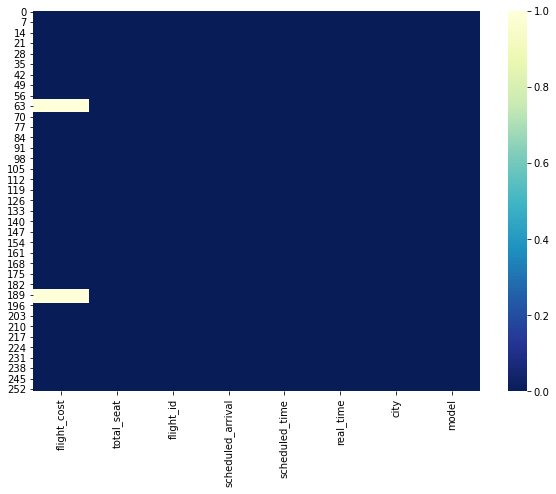

In [8]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.isnull(), cmap="YlGnBu_r");

Имеются 2 облясти пропусков в столбце flight_cost (общая стоимость полета)

In [9]:
data_nan = data[data.flight_cost.isnull() == True]
display(data_nan)
data_nan.city.unique()

,flight_cost,total_seat,flight_id,scheduled_arrival,scheduled_time,real_time,city,model
59,NaN,0,136511,2017-02-21T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
60,NaN,0,136513,2017-02-28T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
61,NaN,0,136514,2017-02-07T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
62,NaN,0,136523,2017-01-10T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
63,NaN,0,136540,2017-01-17T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
64,NaN,0,136544,2017-01-31T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
65,NaN,0,136546,2017-01-03T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
66,NaN,0,136560,2017-01-24T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
67,NaN,0,136567,2017-02-14T11:15:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300
186,NaN,0,181042,2017-02-06T13:20:00Z,305.0,305.0,Novokuznetsk,Boeing 737-300


array(['Novokuznetsk'], dtype=object)

Видим что данным по стоимости полетов в Новокузнецк отсутствуют.
В виду отсутствия данных исключим Новокузнецк из анализа.

In [10]:
data.dropna(axis=0, inplace=True)

Посмотрим имеются ли задержки в перелетах (доп. круги и т.д.)

In [11]:
sum(data.scheduled_time - data.real_time)

0.0

Создадим дополнительные признаки

In [12]:
data.model.unique()

array(['Boeing 737-300', 'Sukhoi Superjet-100'], dtype=object)

Колличество мест:
* Boeing 737-300 = 149
* Sukhoi Superjet-100 = 103


Определим заполняемость салона при авиа перевозках

In [13]:
data['occupancy'] = data.apply(occupancy, axis=1)

Расход топлива (https://class-tour.com/rashod-topliva-raznyh-samoletov/):
* Sukhoi Superjet-100 = 1700 кг/ч
* Boeing 737-300 = 2400 кг/ч

In [14]:
data['fuel'] = data.apply(fuel, axis=1)

Определим прибыльность по формуле: flight_cost - fuel * стоимость топлива

Стоимость топлива в 2017 г. для Анапы составляла (https://favt.gov.ru/stat-date-gsm-price/?id=7329):
* январь 41435 р за тонну
* февраль 39553 р за тонну
* декабрь 47101 р за тонну

In [15]:
data.scheduled_arrival = data.scheduled_arrival.apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))

In [16]:
def profitability(row):
    if row.scheduled_arrival.month == 1:
        return row.flight_cost - row.fuel / 1000 * 41435
    if row.scheduled_arrival.month == 2:
        return row.flight_cost - row.fuel / 1000 * 39553
    if row.scheduled_arrival.month == 12:
        return row.flight_cost - row.fuel / 1000 * 47101

In [17]:
data['profitability'] = data.apply(profitability, axis=1)
data

,flight_cost,total_seat,flight_id,scheduled_arrival,scheduled_time,real_time,city,model,occupancy,fuel,profitability
0,1653000.0,113,136119,2017-01-03,100.0,100.0,Moscow,Boeing 737-300,0.758389,4000.000000,1.487260e+06
1,1605400.0,109,136120,2017-02-24,100.0,100.0,Moscow,Boeing 737-300,0.731544,4000.000000,1.447188e+06
2,1431000.0,97,136122,2017-01-08,100.0,100.0,Moscow,Boeing 737-300,0.651007,4000.000000,1.265260e+06
3,1556600.0,107,136130,2017-02-13,100.0,100.0,Moscow,Boeing 737-300,0.718121,4000.000000,1.398388e+06
4,1812800.0,124,136131,2017-01-28,100.0,100.0,Moscow,Boeing 737-300,0.832215,4000.000000,1.647060e+06
...,...,...,...,...,...,...,...,...,...,...,...
249,721200.0,92,202891,2017-01-31,50.0,50.0,Belgorod,Sukhoi Superjet-100,0.893204,1416.666667,6.625004e+05
250,639300.0,85,202898,2017-01-16,50.0,50.0,Belgorod,Sukhoi Superjet-100,0.825243,1416.666667,5.806004e+05
251,739500.0,93,202911,2017-01-19,50.0,50.0,Belgorod,Sukhoi Superjet-100,0.902913,1416.666667,6.808004e+05
252,733800.0,92,202913,2017-01-22,50.0,50.0,Belgorod,Sukhoi Superjet-100,0.893204,1416.666667,6.751004e+05


Как видно из profitability данная формула не эффективна ввиду с большого числа других расходов

![](https://studref.com/im/29/5108/564032-13.jpg)

Согласно статье в Комерсанте от 17.03.2017 «Если загрузка кресел меньше, чем 75%, то рейс становится нерентабельным» (https://www.kommersant.ru/doc/3246832), как видно уже из названия, оптимальным параметром для нас будет occupancy (заполняемость) с порогом 0,75

Определим не рентабельные авиарейсы

In [18]:
display(data[data.occupancy < 0.75])
print(f'итого: {data.flight_id[data.occupancy < 0.75].nunique()} рейсов')

,flight_cost,total_seat,flight_id,scheduled_arrival,scheduled_time,real_time,city,model,occupancy,fuel,profitability
1,1605400.0,109,136120,2017-02-24,100.0,100.0,Moscow,Boeing 737-300,0.731544,4000.000000,1.447188e+06
2,1431000.0,97,136122,2017-01-08,100.0,100.0,Moscow,Boeing 737-300,0.651007,4000.000000,1.265260e+06
3,1556600.0,107,136130,2017-02-13,100.0,100.0,Moscow,Boeing 737-300,0.718121,4000.000000,1.398388e+06
7,1604200.0,109,136146,2017-02-09,100.0,100.0,Moscow,Boeing 737-300,0.731544,4000.000000,1.445988e+06
10,1567600.0,110,136165,2017-02-22,100.0,100.0,Moscow,Boeing 737-300,0.738255,4000.000000,1.409388e+06
11,1617600.0,110,136172,2017-01-15,100.0,100.0,Moscow,Boeing 737-300,0.738255,4000.000000,1.451860e+06
12,1434600.0,99,136178,2017-01-29,100.0,100.0,Moscow,Boeing 737-300,0.664430,4000.000000,1.268860e+06
14,1520000.0,104,136185,2017-01-14,100.0,100.0,Moscow,Boeing 737-300,0.697987,4000.000000,1.354260e+06
15,1495600.0,100,136202,2017-01-05,100.0,100.0,Moscow,Boeing 737-300,0.671141,4000.000000,1.329860e+06
16,1457800.0,107,136204,2017-02-23,100.0,100.0,Moscow,Boeing 737-300,0.718121,4000.000000,1.299588e+06


итого: 46 рейсов


In [19]:
print(f'соотношение рентабельнох и не рентабельных авиарейсов {data.flight_id[data.occupancy < 0.75].nunique() / data.flight_id.nunique() * 100}%')


соотношение рентабельнох и не рентабельных авиарейсов 19.491525423728813%


Построим пару графиков для презинтации

In [20]:
data.city.unique()


array(['Moscow', 'Belgorod'], dtype=object)

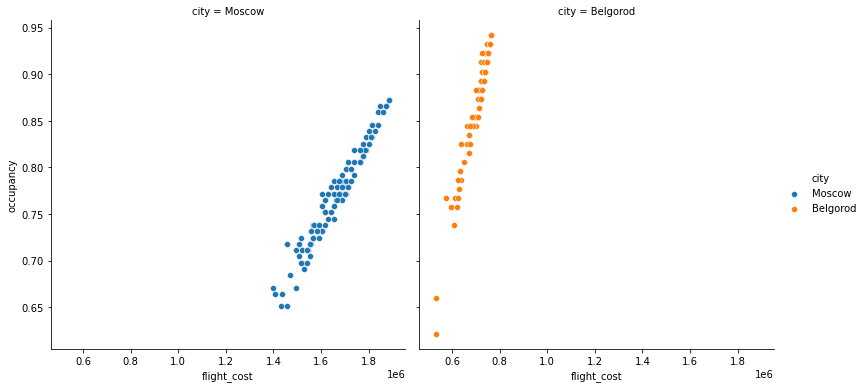

In [21]:
grid = sns.FacetGrid(data, col="city", hue="city", col_wrap=2, height=5.5)
grid.map(sns.scatterplot, "flight_cost", "occupancy")
grid.add_legend();

# Выводы

Из анализа видно:
* около 20% рейсов летавших в Анапу не рентабельны
* Большая часть не рентабильных рейсов из Москвы
* при анализе не учитывальсь рейсы из Новокузнецка ввиду отсутствия информации о стоимости и колличестве пассажиров

Рекомендуется частичное уменьшение колличества рейсов на этих направлениях

# Определим наимение заполненые рейсы

Определим дни недели вылетов

In [22]:
data['week_day'] = data.scheduled_arrival.apply(lambda x: datetime.isoweekday(x))

In [23]:
data_out = data[data.occupancy < 0.75]
data_out

,flight_cost,total_seat,flight_id,scheduled_arrival,scheduled_time,real_time,city,model,occupancy,fuel,profitability,week_day
1,1605400.0,109,136120,2017-02-24,100.0,100.0,Moscow,Boeing 737-300,0.731544,4000.000000,1.447188e+06,5
2,1431000.0,97,136122,2017-01-08,100.0,100.0,Moscow,Boeing 737-300,0.651007,4000.000000,1.265260e+06,7
3,1556600.0,107,136130,2017-02-13,100.0,100.0,Moscow,Boeing 737-300,0.718121,4000.000000,1.398388e+06,1
7,1604200.0,109,136146,2017-02-09,100.0,100.0,Moscow,Boeing 737-300,0.731544,4000.000000,1.445988e+06,4
10,1567600.0,110,136165,2017-02-22,100.0,100.0,Moscow,Boeing 737-300,0.738255,4000.000000,1.409388e+06,3
11,1617600.0,110,136172,2017-01-15,100.0,100.0,Moscow,Boeing 737-300,0.738255,4000.000000,1.451860e+06,7
12,1434600.0,99,136178,2017-01-29,100.0,100.0,Moscow,Boeing 737-300,0.664430,4000.000000,1.268860e+06,7
14,1520000.0,104,136185,2017-01-14,100.0,100.0,Moscow,Boeing 737-300,0.697987,4000.000000,1.354260e+06,6
15,1495600.0,100,136202,2017-01-05,100.0,100.0,Moscow,Boeing 737-300,0.671141,4000.000000,1.329860e+06,4
16,1457800.0,107,136204,2017-02-23,100.0,100.0,Moscow,Boeing 737-300,0.718121,4000.000000,1.299588e+06,4


In [24]:
# посчитаем неудачных вылетов по дням
data_out.week_day.value_counts()


1    10
7     9
6     7
3     6
4     5
5     5
2     4
Name: week_day, dtype: int64

Большее колличество убыточных рейсов вылетает в понедельник
Найдем среднее заполнение по вылетам

In [25]:
data_out.groupby(['week_day'])['occupancy'].mean()

week_day
1    0.707102
2    0.706376
3    0.704698
4    0.699824
5    0.728859
6    0.725735
7    0.700969
Name: occupancy, dtype: float64

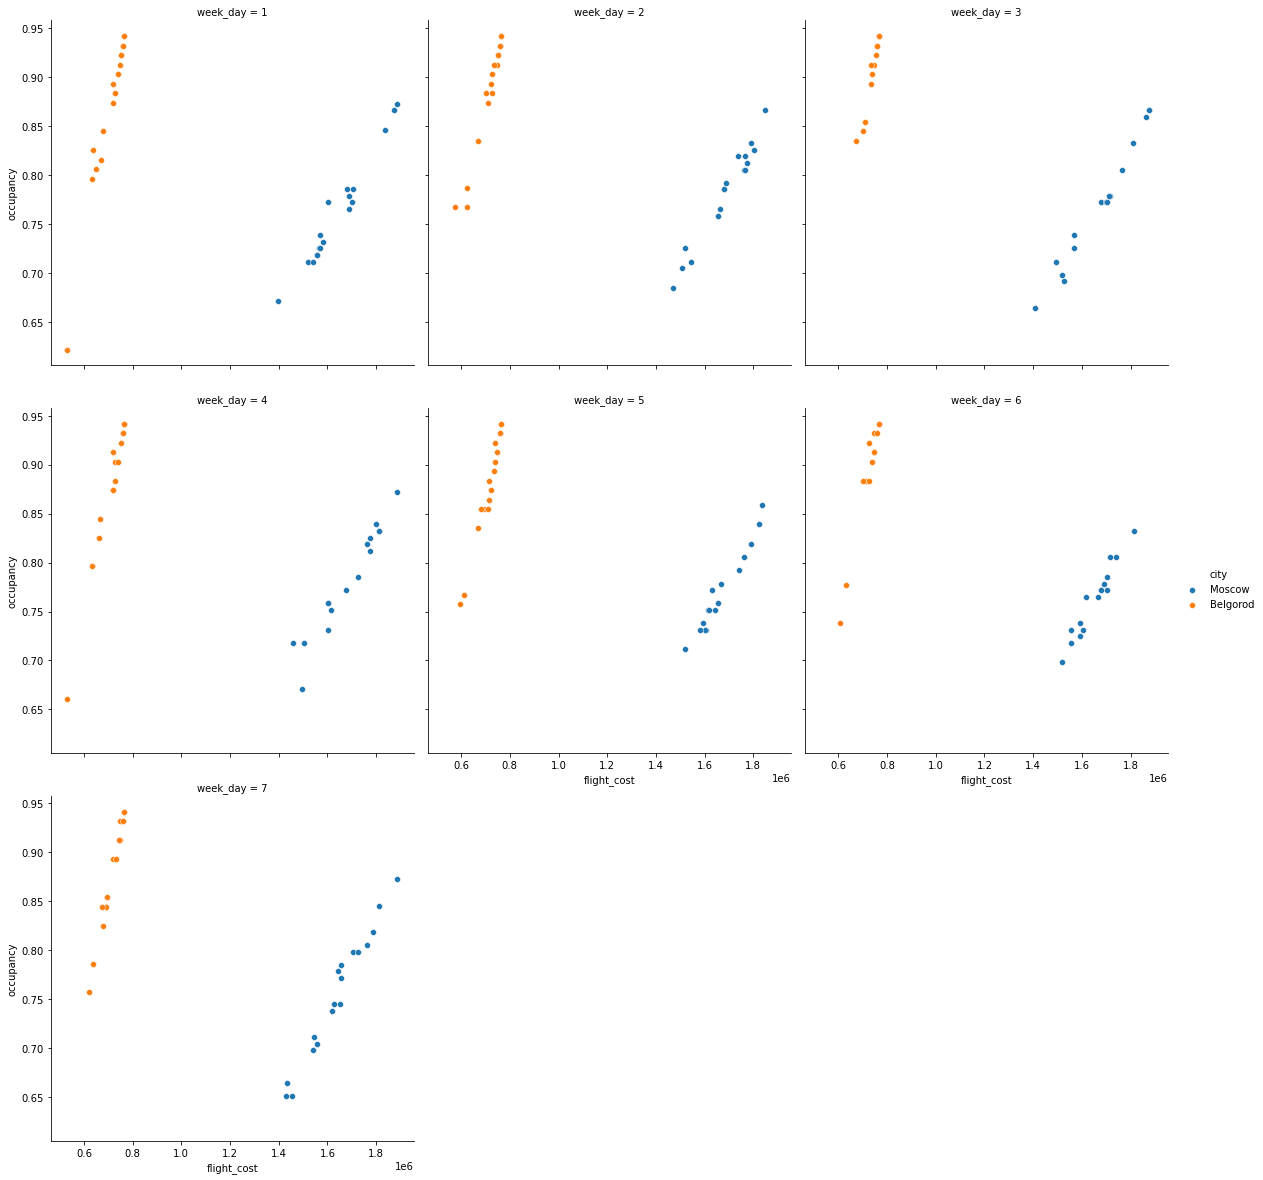

In [26]:
grid = sns.FacetGrid(data, col="week_day", hue="city", col_wrap=3, height=5.5)
grid.map(sns.scatterplot, "flight_cost", "occupancy")
grid.add_legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='week_day', ylabel='Density'>

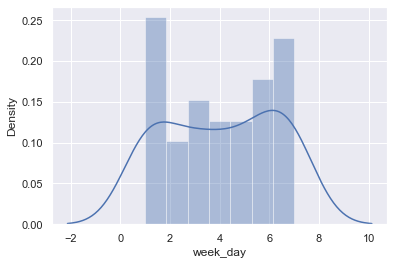

In [27]:
sns.set()
sns.distplot(data_out['week_day'],bins=7)

Определим среднюю цену билета

In [28]:
data['average_ticket'] = data.flight_cost / data.total_seat

In [29]:
data.groupby(['week_day'])['average_ticket'].mean()

week_day
1    11182.844707
2    11152.245972
3    11244.467526
4    11157.261670
5    11207.920305
6    11209.598445
7    11241.920565
Name: average_ticket, dtype: float64

In [30]:
data_out = data[data.occupancy < 0.75]

In [31]:
data_out.groupby(['week_day'])['average_ticket'].mean()

week_day
1    13801.006195
2    14339.755416
3    14415.692047
4    13035.142533
5    14550.359891
6    13622.990696
7    14747.455151
Name: average_ticket, dtype: float64

In [32]:
data_in = data[data.occupancy > 0.75]

In [33]:
data_in.groupby(['week_day'])['average_ticket'].mean()

week_day
1    10175.859519
2    10753.807292
3    10512.646482
4    10809.505955
5    10588.950011
6    10533.848615
7    10073.409037
Name: average_ticket, dtype: float64

In [39]:
data_out.average_ticket.mean() / data_in.average_ticket.mean()

1.3803857916299367

Видны следующие закономентности:
* средняя стоимость билета на рейсы с низкой наполняемостью выше чем с на рейсы с высокой наполняемостью
* разница в стоимости белетов в разрезе недели одинакова

Определим колличество рейсов, которые требуется исключить

In [34]:
total_seat = data_out.total_seat.sum()

In [35]:
for i in range(40):
    data_out.drop(data_out.index[0], inplace=True)
    sit_boing = data_out.model[data_out.model == 'Boeing 737-300'].count() * 149
    sit_sj = data_out.model[data_out.model == 'Sukhoi Superjet-100'].count() * 103
    occupancy = total_seat / (sit_boing + sit_sj)
    if occupancy >= 0.75:
        print(f'При исключении {i} средняя заполняемость {occupancy}')

При исключении 2 средняя заполняемость 0.7613654490349338
При исключении 3 средняя заполняемость 0.7799019607843137
При исключении 4 средняя заполняемость 0.799363590688327
При исключении 5 средняя заполняемость 0.8198213672277568
При исключении 6 средняя заполняемость 0.8413537810682179
При исключении 7 средняя заполняемость 0.8640477914554671
При исключении 8 средняя заполняемость 0.888
При исключении 9 средняя заполняемость 0.9133180252583237
При исключении 10 средняя заполняемость 0.9401221193618279
При исключении 11 средняя заполняемость 0.968547077922078
При исключении 12 средняя заполняемость 0.9987445072190835
При исключении 13 средняя заполняемость 1.0308855291576673
При исключении 14 средняя заполняемость 1.0651640258870787
При исключении 15 средняя заполняемость 1.1018005540166205
При исключении 16 средняя заполняемость 1.1410470953860865
При исключении 17 средняя заполняемость 1.1831928606841844
При исключении 18 средняя заполняемость 1.2285714285714286
При исключении 19 ср

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
data_out = data[data.occupancy < 0.75]
data1 = data_in.append(data_out, sort=False)
total_seat = data1.total_seat.sum()

In [37]:
for i in range(40):
    data_out.drop(data_out.index[0], inplace=True)
    data1 = data_in.append(data_out, sort=False)
    sit_boing = data1.model[data1.model == 'Boeing 737-300'].count() * 149
    sit_sj = data1.model[data1.model == 'Sukhoi Superjet-100'].count() * 103
    occupancy = total_seat / (sit_boing + sit_sj)
    if occupancy >= 0.75:
        print(f'При исключении {i} средняя заполняемость {occupancy}')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


При исключении 0 средняя заполняемость 0.8200899043498834
При исключении 1 средняя заполняемость 0.8242407772267137
При исключении 2 средняя заполняемость 0.8284338830277579
При исключении 3 средняя заполняемость 0.8326698695950583
При исключении 4 средняя заполняемость 0.8369493980890621
При исключении 5 средняя заполняемость 0.8412731433326399
При исключении 6 средняя заполняемость 0.8456417941658244
При исключении 7 средняя заполняемость 0.8500560538116592
При исключении 8 средняя заполняемость 0.8545166402535658
При исключении 9 средняя заполняемость 0.8590242866246548
При исключении 10 средняя заполняемость 0.8635797416094245
При исключении 11 средняя заполняемость 0.8681837698583083
При исключении 12 средняя заполняемость 0.8728371524155545
При исключении 13 средняя заполняемость 0.8775406871609404
При исключении 14 средняя заполняемость 0.8822951892658448
При исключении 15 средняя заполняемость 0.8871014916642294
При исключении 16 средняя заполняемость 0.8919604455390949
При иск

# Рекомендации

* предпочтительно отменять рейсы в понедельник и воскресение
* рекомендуется отменить порядка 10% рейсов, что приведет к увилечению средней заполняемости до 0.93
* на убыточных рейсах билеты дороже в среднем на 38%, что отпугивает клиентов